In [1]:
import rebound
%matplotlib inline
import matplotlib.pyplot as plt
import observations
import state
import mcmc
import driver
import numpy as np
import hashlib
import corner
from datetime import datetime

In [2]:
np.random.seed(2017)
niterEmcee = 1024*15
niterSmala = 4200

In [3]:
obs = driver.ReadObs('HD155358.vels')

In [4]:
sol = [  6.57730330e-01,  -9.72263877e-02,  -7.82798396e-02,   8.84031737e-04,
   4.42804990e+00,   1.04404207e+00,  -2.05622789e-02,  -1.08797961e-01,
   8.30379710e-04,   1.49919861e+00]

{'a': 0.65773033, 'h': -0.0972263877, 'k': -0.0782798396, 'm': 0.000884031737, 'l': 4.4280499}
{'a': 1.04404207, 'h': -0.0205622789, 'k': -0.108797961, 'm': 0.00083037971, 'l': 1.49919861}
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[1.3456579647209153, -0.3111782879962493, 0.0]
[-0.10040105549379322, -0.5750167691072843, 0.0]
[-0.9273537426348033, 0.1621575850335594, 0.0]
[0.29663305036469334, 1.0436376255071829, 0.0]
[-0.00041883056816320016, 0.00014019875566797076, 0.0]
[-0.00015729068590102283, -0.00035766924337062825, 0.0]
[1.345239134152752, -0.31103808924058135, 0.0]
[-0.10055834617969424, -0.5753744383506549, 0.0]
[-0.9277725732029665, 0.16229778378922738, 0.0]
[0.2964757596787923, 1.0432799562638122, 0.0]
above
-0.000418830568163
None
{'a': 0.65773033, 'h': -0.0972263877, 'k': -0.0782798396, 'm': 0.000884031737, 'l': 4.4280499}
{'a': 1.04404207, 'h': -0.0205622789, 'k': -0.108797961, 'm': 0.00083037971, 'l': 1.49919861}
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[1.3456579647209153, -0.3111782879962

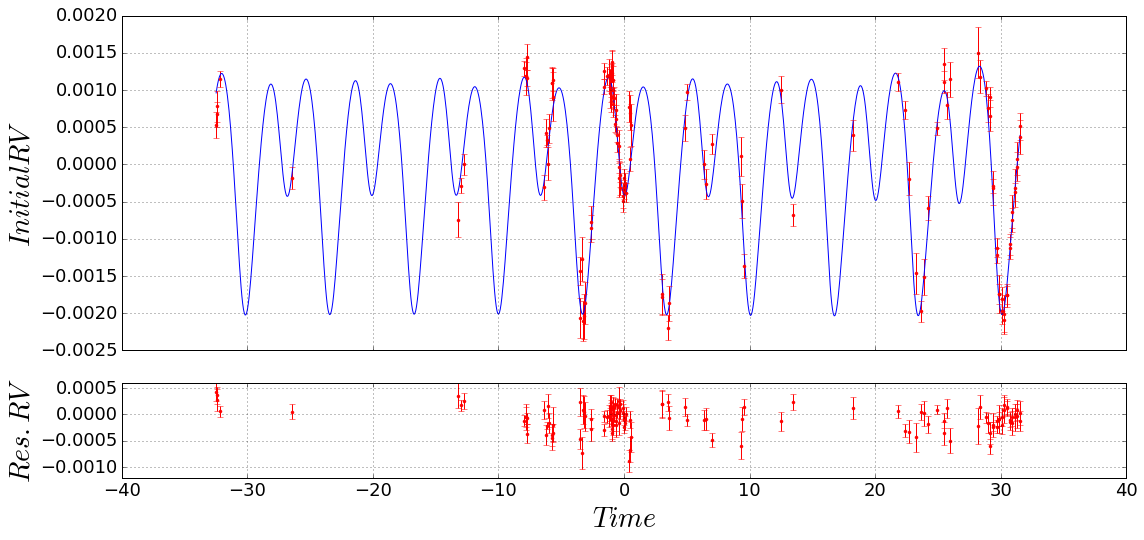

In [5]:
initial_state = state.State(planets=
[{"m":sol[3], "a":sol[0], "h":sol[1], "k":sol[2], "l":sol[4]}, {"m":sol[8], "a":sol[5], "h":sol[6], "k":sol[7], "l":sol[9]}])
initial_state.hillRadiusFactor = 2.
driver.inLinePlotObs(initial_state, obs, [18,6])

In [7]:
print initial_state.get_logp(obs)

-2.41616612321


In [30]:
em_bundle, h1 = driver.createEns('HD155358_emcee_1', 10000, initial_state, obs, 40, {"m":5.5e-6, "a":0.001, "h":0.02, "k":0.02, "l":np.pi/4.}, printing_every=60)

Progress: 0.4%, time: 2017-03-01 20:38:58.019570
Progress: 24.4%, time: 2017-03-01 20:41:12.878914
Progress: 48.4%, time: 2017-03-01 20:43:39.578693
Collision! 2017-03-01 20:44:36.082914 

Collision! 2017-03-01 20:44:38.907247 

Collision! 2017-03-01 20:45:14.495905 

Collision! 2017-03-01 20:45:27.822708 

Collision! 2017-03-01 20:45:30.585161 

Collision! 2017-03-01 20:45:34.485462 

Collision! 2017-03-01 20:45:35.004767 

Collision! 2017-03-01 20:45:39.633486 

Collision! 2017-03-01 20:45:40.140554 

Collision! 2017-03-01 20:45:42.771999 

Collision! 2017-03-01 20:45:59.085123 

Collision! 2017-03-01 20:46:01.498702 

Collision! 2017-03-01 20:46:02.384768 

Collision! 2017-03-01 20:46:03.980491 

Progress: 72.4%, time: 2017-03-01 20:46:04.932498
Collision! 2017-03-01 20:46:08.096774 

Collision! 2017-03-01 20:46:17.265992 

Collision! 2017-03-01 20:46:18.978091 

Collision! 2017-03-01 20:46:22.020124 

Collision! 2017-03-01 20:46:23.369202 

Collision! 2017-03-01 20:46:24.708978 

C

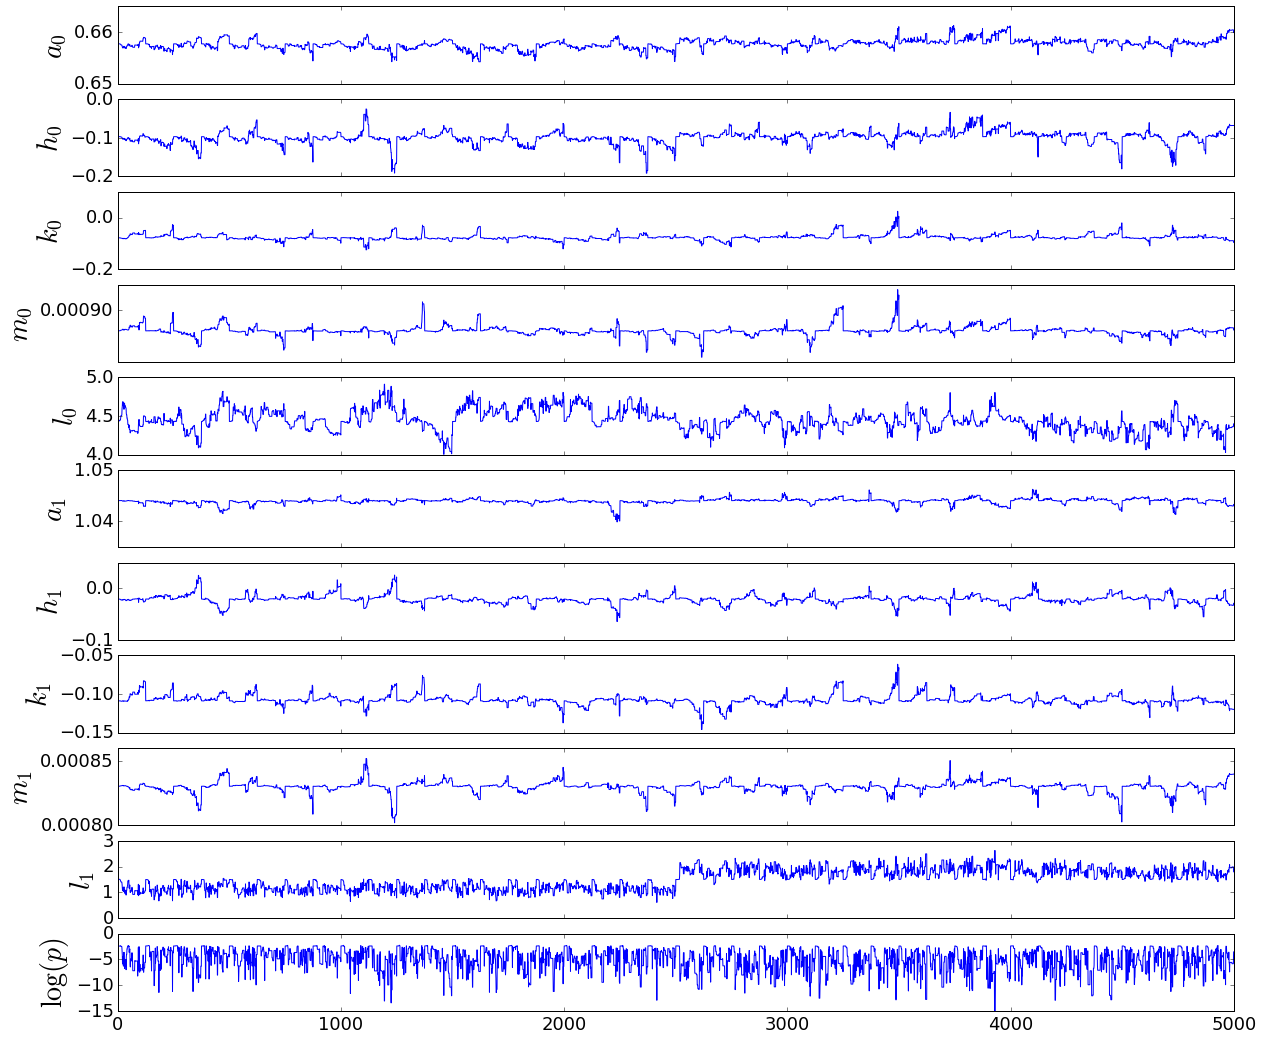

In [29]:
driver.inLinePlotChains(em_bundle, [20,18])

Eliminated burn in, sampled every 1.
Selected some 50 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$h_0$', '$k_0$', '$m_0$', '$l_0$', '$a_1$', '$h_1$', '$k_1$', '$m_1$', '$l_1$']
[  6.57839047e-01  -1.01399218e-01  -7.91210835e-02   8.83846740e-04
   4.43076459e+00   1.04392356e+00  -1.65660093e-02  -1.04423913e-01
   8.31166528e-04   1.45003290e+00]


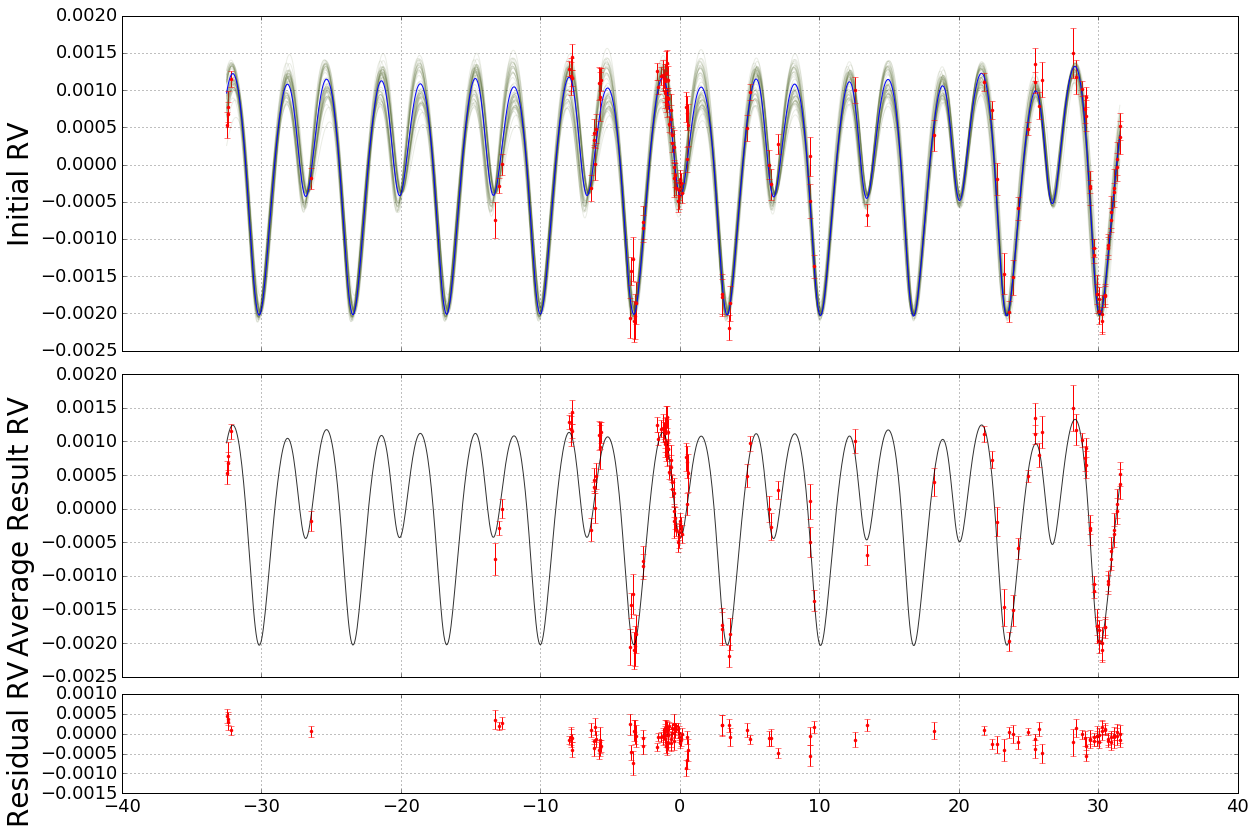

In [19]:
trimEM, trimEMlogp = driver.inLinePlotResults(em_bundle, 50, [20,6], 0.5, take_every_n=1)

AC time 17.453125
AC time 13.34375
AC time 12.671875
AC time 17.90625
AC time 13.78125
AC time 16.984375
AC time 13.875
AC time 12.140625
AC time 18.21875
AC time 15.65625


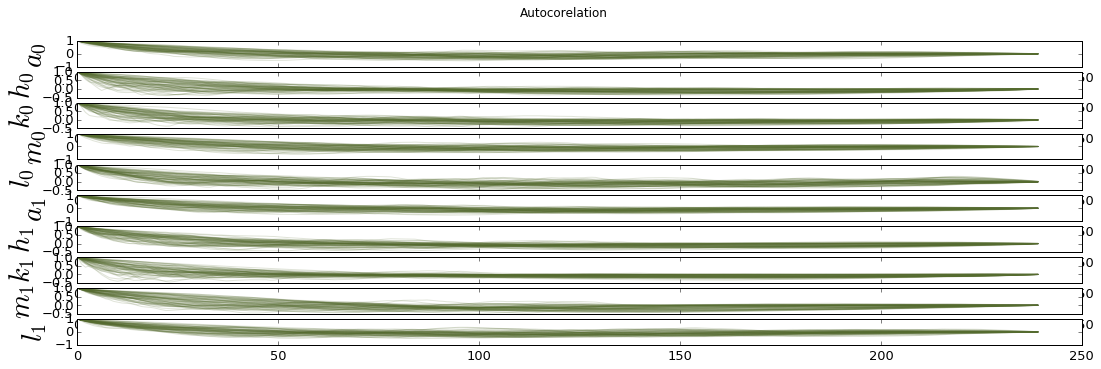

In [12]:
actimes = driver.inLinePlotEmceeAcTimes(em_bundle, [18,6])

# SMALA

In [24]:
sm_bundle, h2 = driver.createSMALA('HD155358_smala_1',niterSmala/25, initial_state, obs, 0.025, 1.4)

Progress: 0.59524%, 4 tries have been made, time: 2017-03-01 06:10:35.285924
Progress: 24.405%, 66 tries have been made, time: 2017-03-01 06:12:31.785557
Progress: 48.214%, 137 tries have been made, time: 2017-03-01 06:14:35.763261
Progress: 72.024%, 206 tries have been made, time: 2017-03-01 06:16:31.092892
Progress: 95.833%, 254 tries have been made, time: 2017-03-01 06:17:54.748140
Acceptance rate: 63.64%
The id of the simulation is: 3c52cfb09833fcca51e70fddeb34178b
The end time of the simulation is 2017-03-01 06:18:13.615665


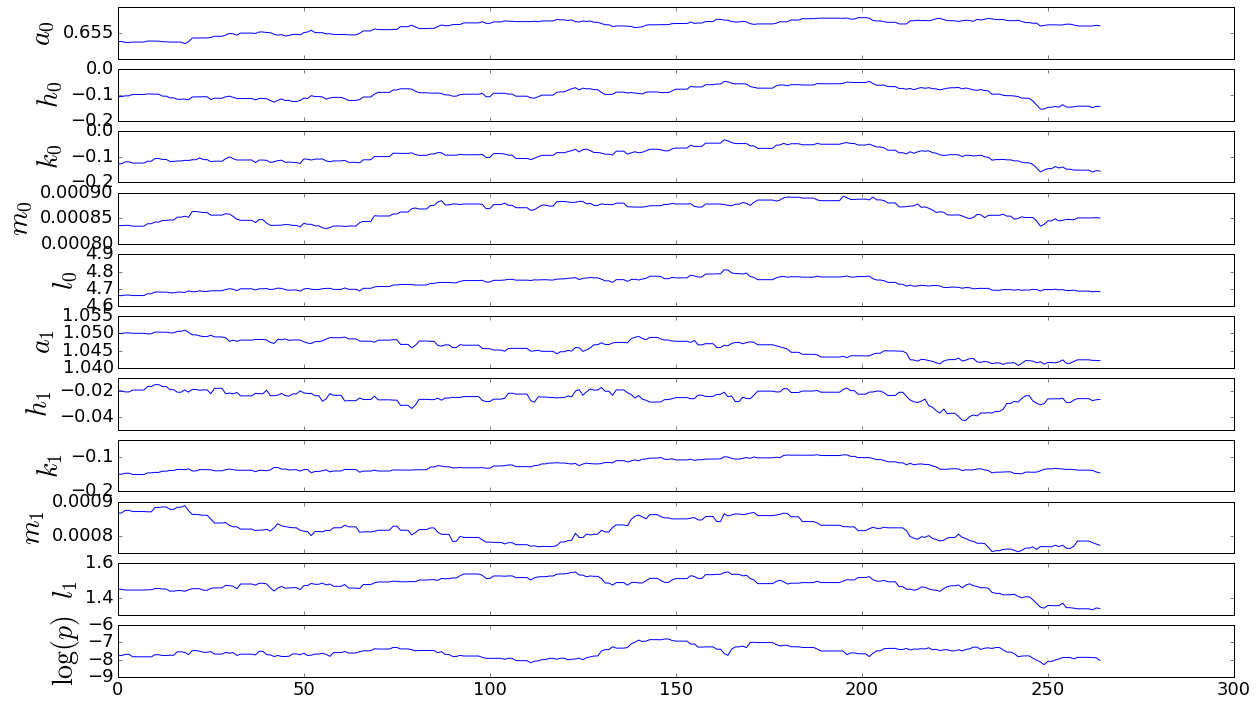

In [25]:
driver.inLinePlotChains(sm_bundle, [20,12])

Eliminated burn in, sampled every 1, for every walker.
Selected some 40 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$h_0$', '$k_0$', '$m_0$', '$l_0$', '$a_1$', '$h_1$', '$k_1$', '$m_1$', '$l_1$']
[  6.56155669e-01  -8.79343893e-02  -8.08350947e-02   8.76302332e-04
   4.75824783e+00   1.04653045e+00  -2.43418329e-02  -1.17295749e-01
   8.15509362e-04   1.51839660e+00]


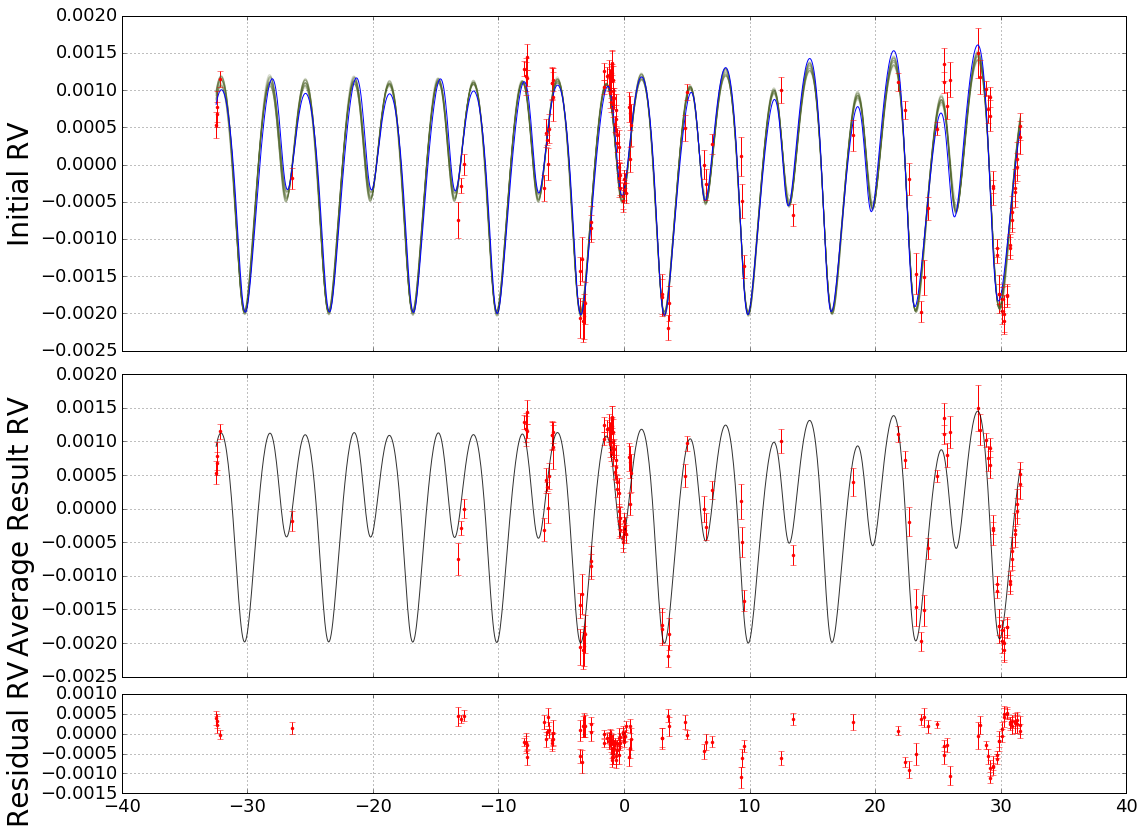

In [26]:
s2 = driver.inLinePlotResults(sm_bundle, 40, [18,6], burn_in_fraction=0.5, take_every_n=1)

In [34]:
print np.max(sm_bundle.mcmc_chainlogp)
print sm_bundle.mcmc_chain[np.where(sm_bundle.mcmc_chainlogp==np.max(sm_bundle.mcmc_chainlogp))[0]]

-6.7971014711
[[  6.55966504e-01  -9.13957298e-02  -7.78916533e-02   8.77209959e-04
    4.75859384e+00   1.04807688e+00  -2.67169122e-02  -1.06648719e-01
    8.52818253e-04   1.48984230e+00]
 [  6.55966504e-01  -9.13957298e-02  -7.78916533e-02   8.77209959e-04
    4.75859384e+00   1.04807688e+00  -2.67169122e-02  -1.06648719e-01
    8.52818253e-04   1.48984230e+00]]


AC time 30.0
AC time 17.0
AC time 23.0
AC time 23.0
AC time 30.0
AC time 27.0
AC time 12.0
AC time 29.0
AC time 19.0
AC time 16.0


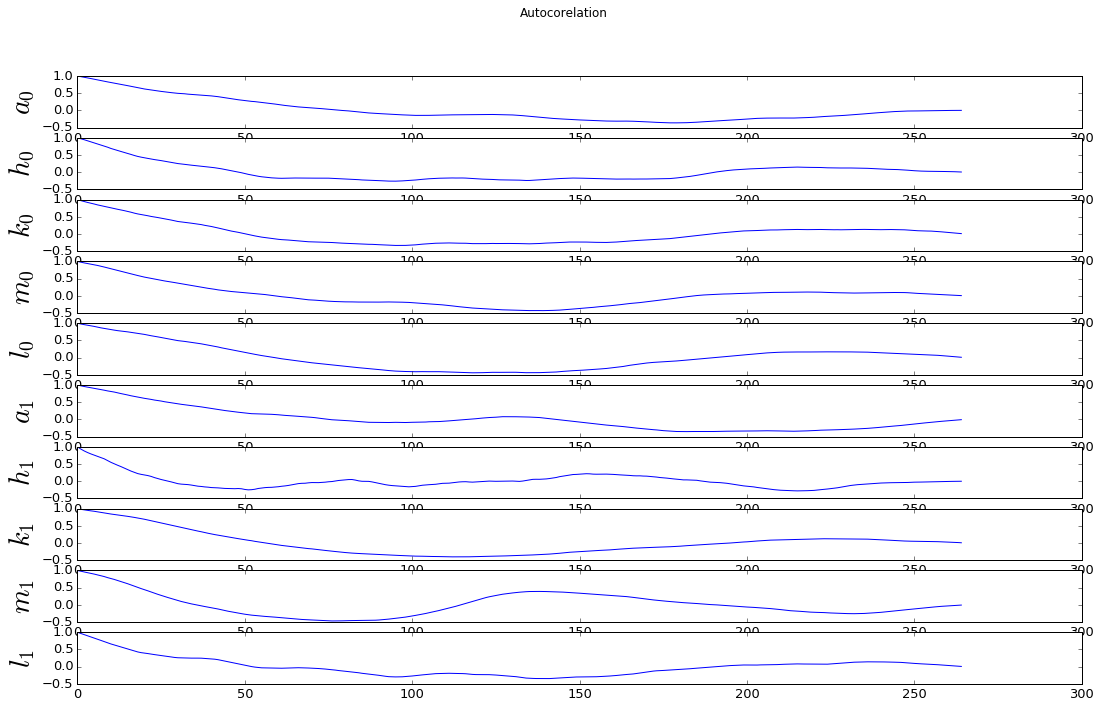

In [27]:
actimes2 = driver.inLinePlotAcTimes(sm_bundle, [18,12])

In [1]:
print sm_bundle.mcmc_is_emcee

NameError: name 'sm_bundle' is not defined